# K-Means Clustering

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [42]:
# Generate the data - this part is correct
data1 = np.array([[random.randint(1, 400) for i in range(2)] for j in range(50)], dtype=np.float64)
data2 = np.array([[random.randint(300, 700) for i in range(2)] for j in range(50)], dtype=np.float64)
data3 = np.array([[random.randint(600, 900) for i in range(2)] for j in range(50)], dtype=np.float64)

data = np.concatenate([data1, data2, data3])

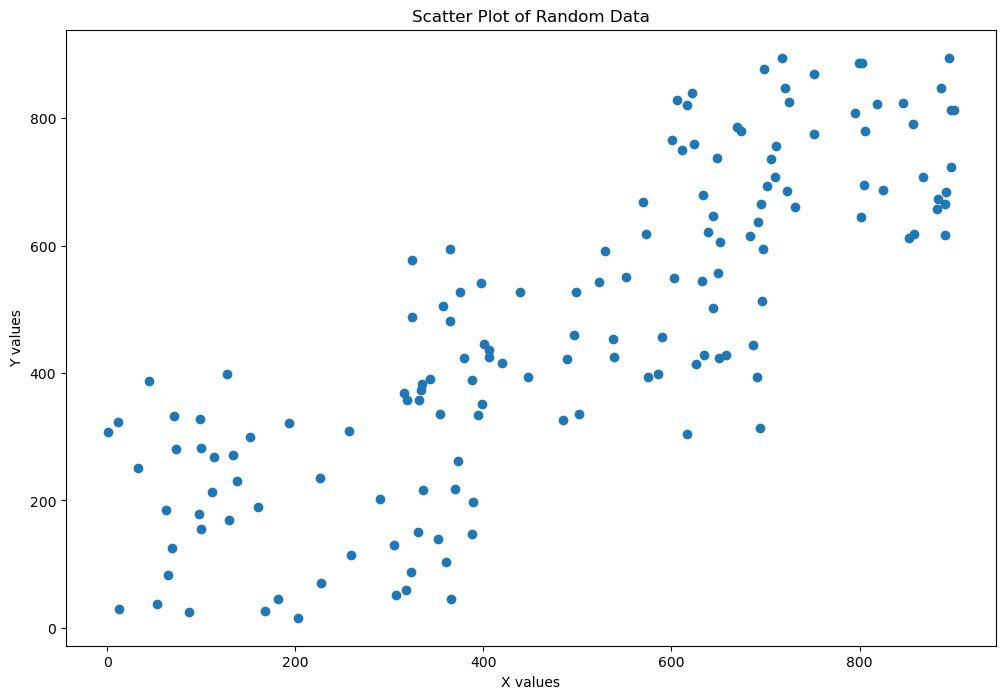

In [43]:
fig, axes = plt.subplots(figsize = (12, 8))

plt.scatter(x=data[:, 0], y=data[:, 1])
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot of Random Data')
plt.show()

In [44]:
label1 = np.array([0 for i in range(50)])
label2 = np.array([1 for i in range(50)])
label3 = np.array([2 for i in range(50)])

labels = np.concatenate([label1, label2, label3])
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
number_data = pd.DataFrame({
    "data_x" : data[:,0],
    "data_y" : data[:,1],
    "labels" : labels
})
number_data.sample(10)

,data_x,data_y,labels
85,658.0,429.0,1
97,316.0,369.0,1
101,806.0,780.0,2
71,343.0,391.0,1
28,389.0,198.0,0
147,711.0,757.0,2
77,697.0,595.0,1
100,622.0,839.0,2
15,73.0,281.0,0
121,601.0,766.0,2


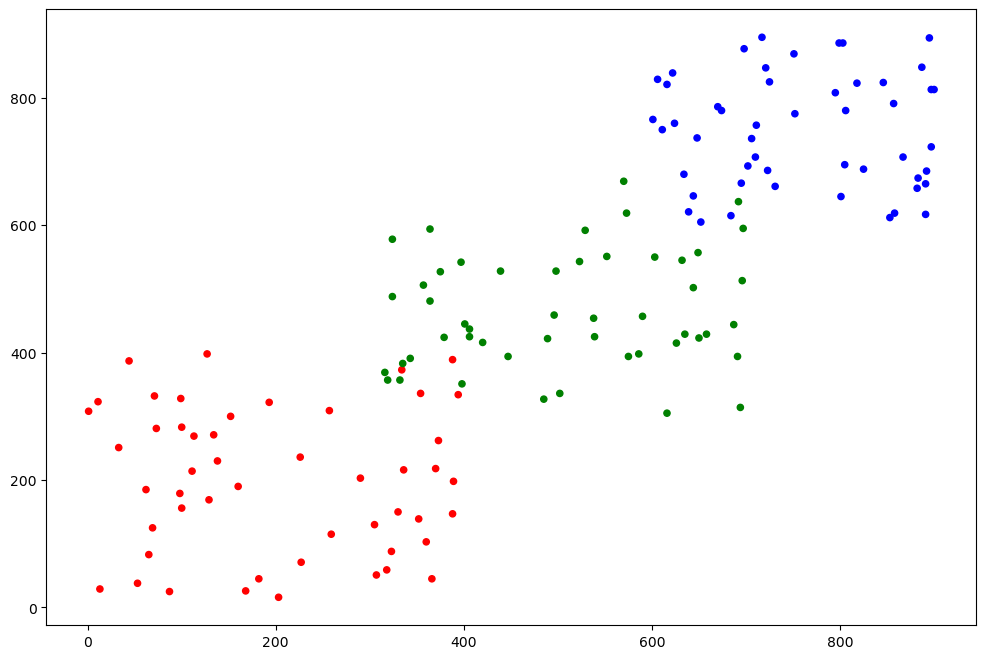

In [46]:
import matplotlib.colors

fig, axes = plt.subplots(figsize = (12, 8))
colors = ["red", "green", "blue"]
plt.scatter(x = number_data["data_x"], y = number_data["data_y"], c=number_data["labels"], cmap= matplotlib.colors.ListedColormap(colors), s=20)
plt.show()

## Modelling

In [47]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, max_iter=10000).fit(data)
kmeans_model.labels_

c:\Users\siddh\anaconda3\envs\ml-project\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [48]:
centroids = kmeans_model.cluster_centers_
centroids

array([[487.68627451, 446.07843137],
       [186.19565217, 184.84782609],
       [752.33962264, 741.20754717]])

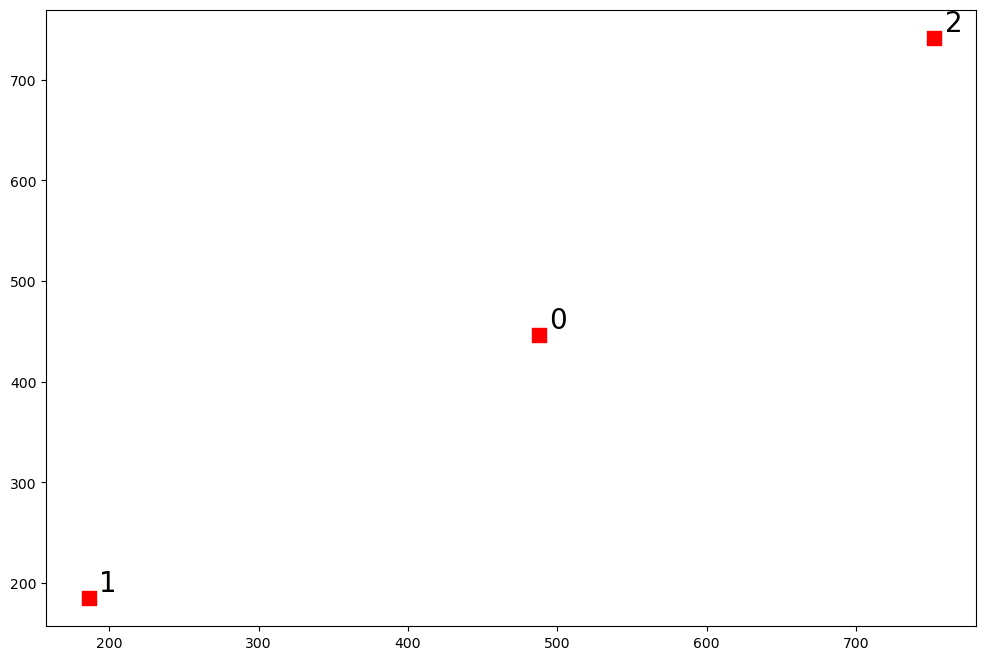

In [51]:
fig, axes = plt.subplots(figsize = (12, 8))

plt.scatter(x = centroids[:, 0],y = centroids[:, 1],c='r', s= 100, marker = 's')
for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize = 20)
plt.show()

In [53]:
from sklearn import metrics
print("Homogeneity score : ", metrics.homogeneity_score(labels, kmeans_model.labels_))
print("Completeness score : ", metrics.completeness_score(labels, kmeans_model.labels_))
print("V_Measure score : ", metrics.v_measure_score(labels, kmeans_model.labels_))
print("adjusted rand score : ", metrics.adjusted_rand_score(labels, kmeans_model.labels_))
print("adjusted mutual info score : ", metrics.adjusted_mutual_info_score(labels, kmeans_model.labels_))
print("Silhouette score : ", metrics.silhouette_score(data, kmeans_model.labels_))

Homogeneity score :  0.8449590931609804
Completeness score :  0.8463078712238384
V_Measure score :  0.8456329443700841
adjusted rand score :  0.865717047071825
adjusted mutual info score :  0.8436993545231102
Silhouette score :  0.49713244625360875


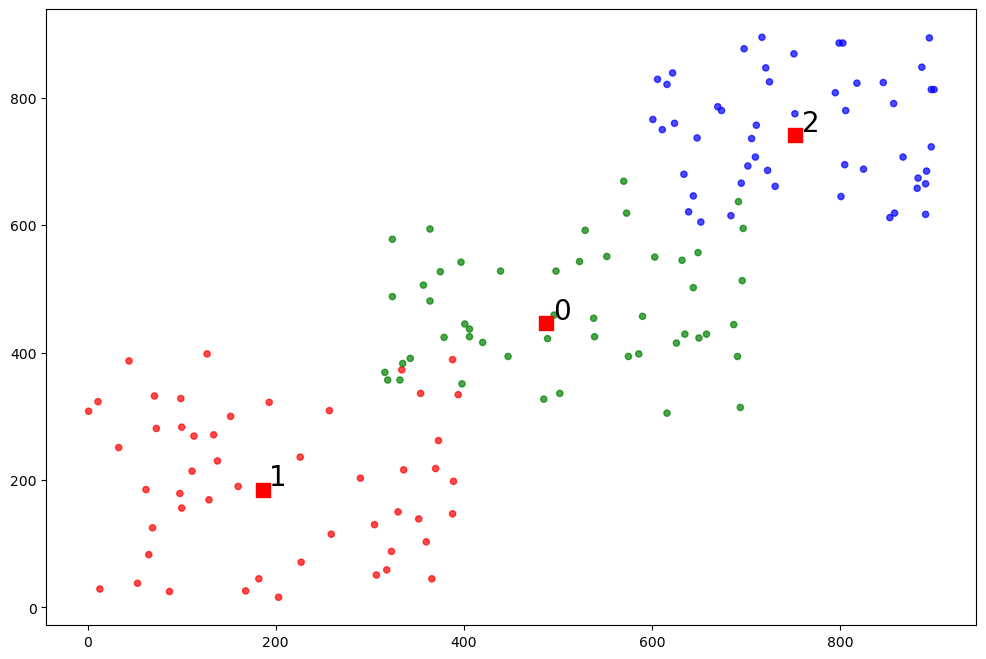

In [54]:
import matplotlib.colors

fig, axes = plt.subplots(figsize = (12, 8))
colors = ["red", "green", "blue"]
plt.scatter(x = number_data["data_x"], y = number_data["data_y"], c=number_data["labels"], cmap= matplotlib.colors.ListedColormap(colors), s=20, alpha=0.7)


plt.scatter(x = centroids[:, 0],y = centroids[:, 1],c='r', s= 100, marker = 's')
for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize = 20)
plt.show()

## Predictions

In [ ]:
test_data = np.array([
    [422., 521.],
    [50., 153.],
    [333., 373.],
    [838., 816.],])
labelsPred = kmeans_model.predict(test_data)
labelsPred

array([0, 1, 0, 2], dtype=int32)